<a href="https://colab.research.google.com/github/Junrulin0225/Taiwan_Cancer_Registry_Project/blob/main/Count_Values_for_each_Columns(Data_Cleaning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv('Answer for Cancer.csv')

In [155]:
df.head()

,CompID,REG_NO,RESID,DIAGAGE,CLASS,CLASS_D,CLASS_T,CONT_DT,DIAG_DT,CASITE,...,OSTAGE_E,OSTAGE_INTERP,RTINSTI,RTNOR,CSTATUS,CAUDEATH,CHCYCLE,TSIZE_C,TSIZE_P,ID
0,KMUH,201402000210,732,73,2.0,2.0,3.0,20130318.0,20130306,C509,...,0.0,8.0,1.0,0.0,2.0,C509,NaN,NaN,NaN,8147
1,KMUH,202011000202,729,99,1.0,1.0,1.0,20191129.0,20191129,C220,...,NaN,NaN,NaN,NaN,2.0,0000,NaN,5.5,99.9,29130
2,KMUH,201409000823,732,69,1.0,1.0,1.0,20131014.0,20131014,C187,...,0.0,8.0,0.0,1.0,1.0,0000,NaN,NaN,NaN,44312
3,KMUH,201402000137,733,77,1.0,1.0,1.0,20130214.0,20130214,C619,...,0.0,8.0,1.0,0.0,1.0,0000,NaN,NaN,NaN,31113
4,KMUH,201808000492,711,85,0.0,1.0,0.0,20170808.0,20170808,C220,...,2005.0,3.0,0.0,1.0,2.0,C220,NaN,5,99.9,15784


In [156]:
df.set_index('ID', inplace = True)

In [157]:
# Filter the columns we need
cols = ['CASITE','LATERAL','HIST','BEHAVIOR','GRADE_P','CONFIRM','PNI','LVI','NEXAM','NPOSIT','SDIAG','PT','PN','PM','PSTAGE','PDESCR','AJCC_E','AJCC_D','OPMARGS','SMARGIN_D','OPLNSCOPE']
df = df[cols]

In [158]:
df.index.name = 'case number'
df.head()

,CASITE,LATERAL,HIST,BEHAVIOR,GRADE_P,CONFIRM,PNI,LVI,NEXAM,NPOSIT,...,PT,PN,PM,PSTAGE,PDESCR,AJCC_E,AJCC_D,OPMARGS,SMARGIN_D,OPLNSCOPE
case number,,,,,,,,,,,,,,,,,,,,,
8147,C509,1,8500.0,3.0,NaN,1,NaN,NaN,15.0,3.0,...,1C,1A,B,2A,0.0,07,NaN,0,NaN,5.0
29130,C220,1,8170.0,3.0,9,1,7.0,7.0,0.0,98.0,...,X,X,B,BBB,0.0,08,22.0,8,988.0,0.0
44312,C187,0,8140.0,3.0,NaN,1,NaN,NaN,14.0,2.0,...,3,1B,B,3B,0.0,07,NaN,0,NaN,5.0
31113,C619,0,8140.0,3.0,NaN,1,NaN,NaN,0.0,98.0,...,X,X,B,BBB,0.0,07,NaN,8,NaN,0.0
15784,C220,0,8170.0,3.0,NaN,1,NaN,NaN,0.0,98.0,...,X,X,B,BBB,0.0,07,NaN,8,NaN,0.0


In [159]:
df.shape

(39382, 21)

In [160]:
df.drop_duplicates(inplace = True)

In [161]:
df.shape

(22859, 21)

In [162]:
# Check how many cases are correlated to each code of each column
print(df['GRADE_P'].value_counts())

2    3768
9    3346
1    1544
3    1479
H     480
8     395
X     237
M     155
L     122
5      90
B      64
4      56
A      42
C      39
D      11
Name: GRADE_P, dtype: int64


<Axes: ylabel='count'>

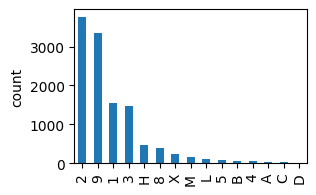

In [163]:
# Use count plot to check the proportion of each code of each column
plt.figure(figsize=(3,2))
df['GRADE_P'].value_counts().plot(kind= 'bar', ylabel = 'count')

In [164]:
# Make the value count of each column to table (DataFrame) so it is easier to read
df['GRADE_P'].value_counts().rename_axis('col name').reset_index(name='counts')

,col name,counts
0,2,3768
1,9,3346
2,1,1544
3,3,1479
4,H,480
5,8,395
6,X,237
7,M,155
8,L,122
9,5,90


In [165]:
for col in cols:
  col
  col_counts = df[col].value_counts().rename_axis('col name').reset_index(name='counts')
  col_counts.to_excel('col_counts.xlsx')